In [1]:
from hojas import *

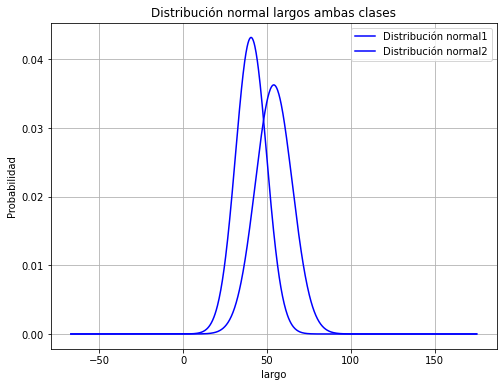

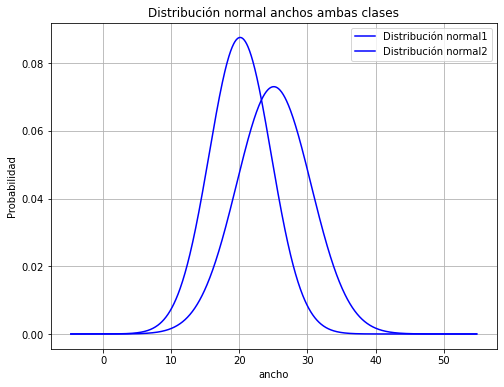

In [2]:
# --------------------- APRENDIZAJE BAYESIANO CON DATA HOJAS / GAUSSIANA MULTIVARIABLE ---------------------
def graph_como_normales(esp1, var1, esp2, var2, title, xlabel):
    x = np.linspace(esp1-var1, esp1 + var1, 1000)

    # Calcular la función de densidad de probabilidad (PDF) de la distribución normal
    pdf1 = (1 / (np.sqrt(2 * np.pi * var1))) * np.exp(-((x - esp1) ** 2) / (2 * var1))
    pdf2 = (1 / (np.sqrt(2 * np.pi * var2))) * np.exp(-((x - esp2) ** 2) / (2 * var2))

    # Crear el gráfico
    plt.figure(figsize=(8, 6))
    plt.plot(x, pdf1, label='Distribución normal1', color='b')
    plt.plot(x, pdf2, label='Distribución normal2', color='b')

    # Agregar etiquetas y título
    plt.title(f'Distribución normal {title}')
    plt.xlabel(xlabel)
    plt.ylabel('Probabilidad')
    plt.legend()
    plt.grid()

    # Mostrar el gráfico
    plt.show()

graph_como_normales(esp_largo_c1, var_largo_c1,esp_largo_c2, var_largo_c2, 'largos ambas clases', 'largo')
graph_como_normales(esp_ancho_c1, var_ancho_c1,esp_ancho_c2, var_ancho_c2, 'anchos ambas clases', 'ancho')

### FORMULA BAYES:

$P(w_i|x, D) = \frac{P(x|w_i, D) \cdot P(w_i)}{\sum_{j=1}^{C} P(x|w_j, D_j) \cdot P(w_j)}$


In [9]:
# --------------------- APRENDIZAJE BAYESIANO CON DATA HOJAS (ITERATIVO CADA VEZ QUE AGRAGO MUESTRAS) ---------------------
def mu_iter(n, muestras, mu_0, sigma_0, sigma):
    """
    mu_n = (n sigma_0^2 /n sigma_0^2 sigma^2)x_prom + (sigma^2 /n sigma_0^2 sigma^2)mu_0
    si n -> inf ---> mu_n^2 -> x_prom
    """

    mu_n = (n*(sigma_0)*(np.sum(muestras)/n)) + (sigma*mu_0)
    mu_n /= ((n*(sigma_0))+sigma)
    return mu_n

def sigma_iter(n, sigma_0, sigma):
    """
    sigma_n^2 = (sigma_0^2 sigma^2 /n sigma_0^2 sigma^2)
    si n -> inf ---> sigma_n^2 -> 0
    """
    sigma_n = sigma_0*sigma
    sigma_n /= ((n*(sigma_0))+sigma)
    return sigma_n


def iter_bayes(muestras, mu_0, sigma_0, sigma):
    mu_todos = []
    sigma_todos = []
    for i in range(1, len(muestras)+1):
        mu_n = mu_iter(i, muestras[:i], mu_0, sigma_0, sigma)
        mu_todos.append(mu_n)
        sigma_n = sigma_iter(i, sigma_0, sigma)
        sigma_todos.append(sigma_n)
    #print(f'mu = {mu_n}, sigma = {sigma_n}')
    return mu_todos, sigma_todos


def plot_sigma_mu(mus, sigmas, n, name, mu_esp):
    t = np.arange(1, n+1, 1)

    plt.figure()
    plt.scatter(t, mus, label='mu_n')
    plt.axhline(y=mu_esp, color='r', linestyle='--', label=f'Esperanza muestral y={round(mu_esp, 3)}')
    #plt.scatter(t, sigmas, label='sigma_n')
    plt.title(f'Iteraciones de aprendizaje de Bayes de {name}')
    plt.xlabel('numero de iteración')
    plt.ylabel('mu_n')
    plt.legend()
    plt.show()

def iters_como_normales(esp, var):
    plt.figure()
    x = np.linspace(0, 100, 1000)
    for i in range(0, len(esp)-1, 100):

        # Calcular la función de densidad de probabilidad (PDF) de la distribución normal
        pdf = (1 / (np.sqrt(2 * np.pi * var[i]))) * np.exp(-((x - esp[i]) ** 2) / (2 * var[i]))
        plt.plot(x, pdf, label=f'Distribución normal {i}')

    pdf = (1 / (np.sqrt(2 * np.pi * var[len(esp)-1]))) * np.exp(-((x - esp[len(esp)-1]) ** 2) / (2 * var[len(esp)-1]))
    plt.plot(x, pdf, label=f'Distribución normal última')

    # Agregar etiquetas y título
    plt.title('Distribución normal con media 0 y varianza 1')
    plt.xlabel('Valores')
    plt.ylabel('Probabilidad')
    plt.legend()
    plt.grid()

    # Mostrar el gráfico
    plt.show()

def buscar_mu_con_bayes(muestra, name):
    mu_0 = muestra[0]
    sigma_0 = 10
    sigma = np.var(muestra)

    mu_todo, sigma_todo = iter_bayes(muestra, mu_0, sigma_0, sigma)
    plot_sigma_mu(mu_todo, sigma_todo, len(muestra), name, np.mean(muestra))
    iters_como_normales(mu_todo, sigma_todo)
    return mu_todo[-1], sigma_todo[-1]


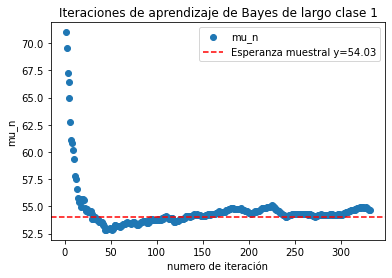

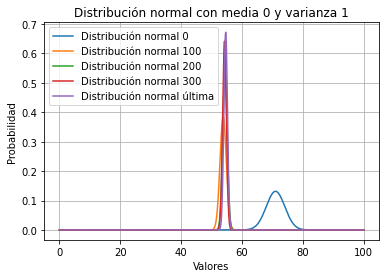

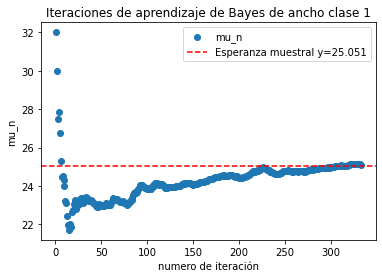

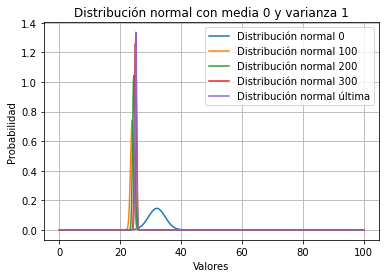

In [10]:
# ------ CLASE 1 ------
mu_n_l1, sigma_n_l1 = buscar_mu_con_bayes(c1['largo'], 'largo clase 1')
mu_n_a1, sigma_n_a1 = buscar_mu_con_bayes(c1['ancho'], 'ancho clase 1')


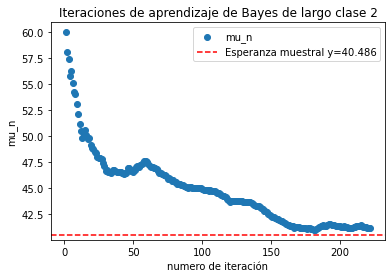

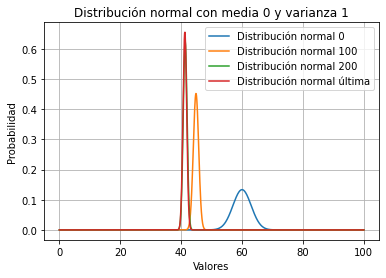

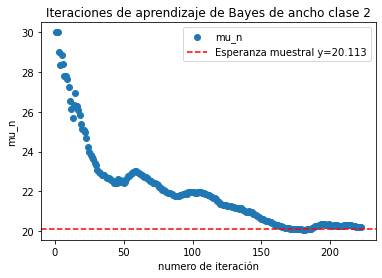

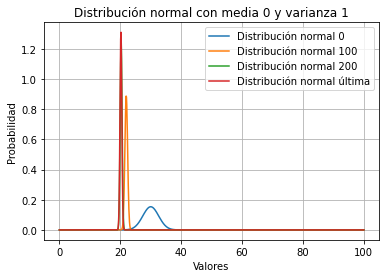

In [11]:
# ------ CLASE 2 ------
mu_n_l2, sigma_n_l2 = buscar_mu_con_bayes(c2['largo'], 'largo clase 2')
mu_n_a2, sigma_n_a2 = buscar_mu_con_bayes(c2['ancho'], 'ancho clase 2')

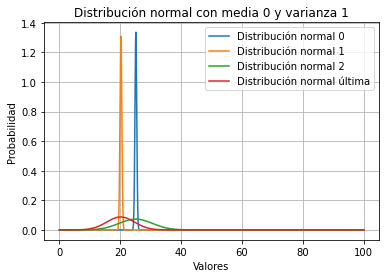

In [12]:
# --------------------- COMPARAR NORMALES BAYES ---------------------
def normales(esp, var):
    plt.figure()
    x = np.linspace(0, 100, 1000)
    for i in range(0, len(esp)-1):

        # Calcular la función de densidad de probabilidad (PDF) de la distribución normal
        pdf = (1 / (np.sqrt(2 * np.pi * var[i]))) * np.exp(-((x - esp[i]) ** 2) / (2 * var[i]))
        plt.plot(x, pdf, label=f'Distribución normal {i}')

    pdf = (1 / (np.sqrt(2 * np.pi * var[len(esp)-1]))) * np.exp(-((x - esp[len(esp)-1]) ** 2) / (2 * var[len(esp)-1]))
    plt.plot(x, pdf, label=f'Distribución normal última')

    # Agregar etiquetas y título
    plt.title('Distribución normal con media 0 y varianza 1')
    plt.xlabel('Valores')
    plt.ylabel('Probabilidad')
    plt.legend()
    plt.grid()

    # Mostrar el gráfico
    plt.show()
mu_todo = [mu_n_a1, mu_n_a2, esp_ancho_c1, esp_ancho_c2]
sigma_todo = [sigma_n_a1, sigma_n_a2, var_ancho_c1, var_ancho_c2]
normales(mu_todo, sigma_todo)
